In [3]:
# Import dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

34.42005372331835 -26.738685211543412
-64.49249869203906 45.53834205161033
31.83142820427858 179.95273355221008
26.615694684985655 -53.56053815319294
-58.07522236513437 -101.32758826487104
-10.265342682264432 -68.18115688386524
44.82369145099884 114.2575590493829
46.0599092908015 -33.94455231353231
-38.94388750371958 -10.238553301509256
-25.305107178132815 44.295067124816114
-24.393662466436496 -94.36119166913019
75.9905461917765 79.0972897586957
66.63488907964046 52.73621382062282
0.5101530976416342 117.43977231893314
46.26648736506175 98.88641085137016
89.10601157877423 -166.11225466442448
-59.081909899600966 133.52981707731624
58.11282148575614 114.29350401732808
-82.66378742156934 -110.2349633378512
59.90305090553511 -142.91714560060586
25.50228868828063 29.58580827017775
-64.14937234030994 -164.53372117694664
57.53715607400315 -117.62855058690009
41.01109954112917 -174.17863667946918
-30.231473480774355 160.9562232126267
57.80608688376151 14.360369752483052
-89.46768024165169 -5.5

-72.42810986342123 -153.5413645376752
-27.167924556452355 169.0250251588679
-54.76446698616757 -160.13215980443337
-52.903385903593296 109.10741527139851
17.63809948338313 162.8786171963876
15.837008358101983 92.96566598744585
15.619354816768208 162.0954649133223
-1.397926568665838 117.4315157783509
-81.93961132897553 53.521854503707544
-72.12264959972322 66.9225401366844
-71.22370486480673 24.4722298921194
67.34286521970955 35.88101500662947
-86.19399496523836 -50.66937707767349
41.32120166937031 -135.87296729265992
-35.858534010757076 -123.82071032616446
-70.52571591324411 173.95125701518822
-32.3110310525889 -14.115587093781812
-13.476002032956615 -80.63479012498887
28.56670531756265 -23.43383881255849
50.80805403422255 89.89830642532127
24.445452158159952 -93.06806110491604
29.315326932664945 -16.010240554179745
57.637331193752885 -28.645203400901693
16.62076592774673 125.73759579511324
-56.494139406149266 -34.229672664805236
60.481762842120276 99.20016885943386
-59.56120114079991 

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9275ca54e7e7ec5625cccc5ad182d85a


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta delgada
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | senador guiomard
Processing Record 7 of Set 1 | baruun-urt
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | ampanihy
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | naryan-mar
Processing Record 14 of Set 1 | bontang
Processing Record 15 of Set 1 | moron
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | balakhninskiy
Processing Record 19 of Set 1 | haines junction
Processing Record 20 of Set 1 | tahta
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | high level
Processing 

Processing Record 37 of Set 4 | zabid
Processing Record 38 of Set 4 | pacific grove
Processing Record 39 of Set 4 | provideniya
Processing Record 40 of Set 4 | saint-augustin
Processing Record 41 of Set 4 | svetlyy
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | morehead
Processing Record 44 of Set 4 | sao joao da barra
Processing Record 45 of Set 4 | dubna
Processing Record 46 of Set 4 | oxelosund
Processing Record 47 of Set 4 | mackay
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | inhambane
Processing Record 50 of Set 4 | faanui
Processing Record 1 of Set 5 | urfa
City not found. Skipping...
Processing Record 2 of Set 5 | velasco ibarra
Processing Record 3 of Set 5 | hailey
Processing Record 4 of Set 5 | drayton valley
Processing Record 5 of Set 5 | yerbogachen
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | kerteh
City not found. Skipping...
Processing Record 9 of S

Processing Record 25 of Set 8 | starogard gdanski
Processing Record 26 of Set 8 | porbandar
Processing Record 27 of Set 8 | hihifo
City not found. Skipping...
Processing Record 28 of Set 8 | vostok
Processing Record 29 of Set 8 | adrar
Processing Record 30 of Set 8 | vardo
Processing Record 31 of Set 8 | roma
Processing Record 32 of Set 8 | asadabad
Processing Record 33 of Set 8 | cedar rapids
Processing Record 34 of Set 8 | aberdeen
Processing Record 35 of Set 8 | verkhnevilyuysk
Processing Record 36 of Set 8 | payo
Processing Record 37 of Set 8 | buenavista
Processing Record 38 of Set 8 | ulundi
Processing Record 39 of Set 8 | fiche
Processing Record 40 of Set 8 | samarai
Processing Record 41 of Set 8 | penhold
Processing Record 42 of Set 8 | anan
Processing Record 43 of Set 8 | nelson bay
Processing Record 44 of Set 8 | falealupo
City not found. Skipping...
Processing Record 45 of Set 8 | timmins
Processing Record 46 of Set 8 | lavrentiya
Processing Record 47 of Set 8 | nikel
Proces

Processing Record 14 of Set 12 | hasaki
Processing Record 15 of Set 12 | irece
Processing Record 16 of Set 12 | kabare
Processing Record 17 of Set 12 | abu samrah
Processing Record 18 of Set 12 | quatre cocos
Processing Record 19 of Set 12 | atikokan
Processing Record 20 of Set 12 | antalaha
Processing Record 21 of Set 12 | van buren
Processing Record 22 of Set 12 | itoman
Processing Record 23 of Set 12 | jilib
Processing Record 24 of Set 12 | oyonnax
Processing Record 25 of Set 12 | arcelia
Processing Record 26 of Set 12 | warrington
Processing Record 27 of Set 12 | khani
Processing Record 28 of Set 12 | sitka
Processing Record 29 of Set 12 | galeana
Processing Record 30 of Set 12 | karratha
Processing Record 31 of Set 12 | port hardy
Processing Record 32 of Set 12 | srisailam
Processing Record 33 of Set 12 | puchezh
Processing Record 34 of Set 12 | ketchikan
Processing Record 35 of Set 12 | igrim
Processing Record 36 of Set 12 | novoagansk
Processing Record 37 of Set 12 | tessalit
Pr

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Delgada,37.7333,-25.6667,60.49,88,75,5.75,PT,2022-05-30 19:30:54
1,East London,-33.0153,27.9116,57.58,57,100,6.78,ZA,2022-05-30 19:30:55
2,Nikolskoye,59.7035,30.7861,62.49,73,99,4.25,RU,2022-05-30 19:30:55
3,Codrington,-38.2667,141.9667,46.94,78,89,15.66,AU,2022-05-30 19:30:55
4,Punta Arenas,-53.1500,-70.9167,46.51,76,0,20.71,CL,2022-05-30 19:30:15
5,Senador Guiomard,-10.1522,-67.7392,91.15,58,96,1.81,BR,2022-05-30 19:30:56
6,Baruun-Urt,46.6806,113.2792,44.04,58,80,2.17,MN,2022-05-30 19:30:56
7,Ribeira Grande,38.5167,-28.7000,63.00,67,40,36.82,PT,2022-05-30 19:30:56
8,Jamestown,42.0970,-79.2353,85.51,39,0,11.50,US,2022-05-30 19:30:57
9,Ampanihy,-24.7000,44.7500,62.85,88,0,4.07,MG,2022-05-30 19:30:57


In [14]:
# City data information
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        544 non-null    object 
 1   Lat         544 non-null    float64
 2   Lng         544 non-null    float64
 3   Max Temp    544 non-null    float64
 4   Humidity    544 non-null    int64  
 5   Cloudiness  544 non-null    int64  
 6   Wind Speed  544 non-null    float64
 7   Country     544 non-null    object 
 8   Date        544 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 38.4+ KB


In [15]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city data df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Delgada,PT,2022-05-30 19:30:54,37.7333,-25.6667,60.49,88,75,5.75
1,East London,ZA,2022-05-30 19:30:55,-33.0153,27.9116,57.58,57,100,6.78
2,Nikolskoye,RU,2022-05-30 19:30:55,59.7035,30.7861,62.49,73,99,4.25
3,Codrington,AU,2022-05-30 19:30:55,-38.2667,141.9667,46.94,78,89,15.66
4,Punta Arenas,CL,2022-05-30 19:30:15,-53.1500,-70.9167,46.51,76,0,20.71


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

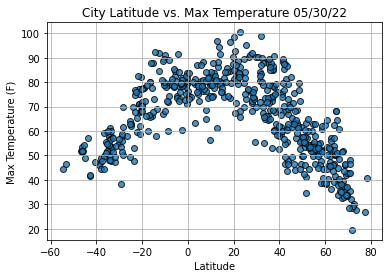

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

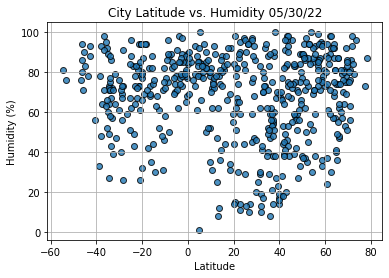

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

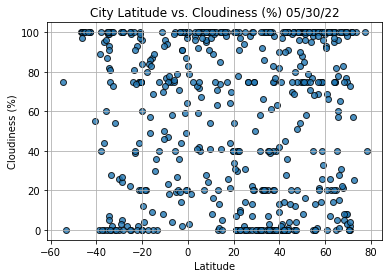

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

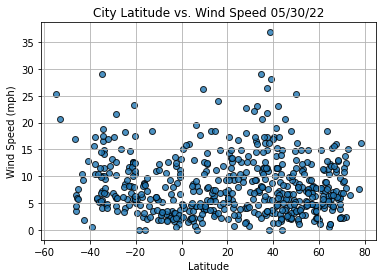

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                      Bontang
Country                        ID
Date          2022-05-30 19:30:58
Lat                        0.1333
Lng                         117.5
Max Temp                    76.23
Humidity                       84
Cloudiness                     83
Wind Speed                   4.76
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Delgada,PT,2022-05-30 19:30:54,37.7333,-25.6667,60.49,88,75,5.75
2,Nikolskoye,RU,2022-05-30 19:30:55,59.7035,30.7861,62.49,73,99,4.25
6,Baruun-Urt,MN,2022-05-30 19:30:56,46.6806,113.2792,44.04,58,80,2.17
7,Ribeira Grande,PT,2022-05-30 19:30:56,38.5167,-28.7000,63.00,67,40,36.82
8,Jamestown,US,2022-05-30 19:30:57,42.0970,-79.2353,85.51,39,0,11.50


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

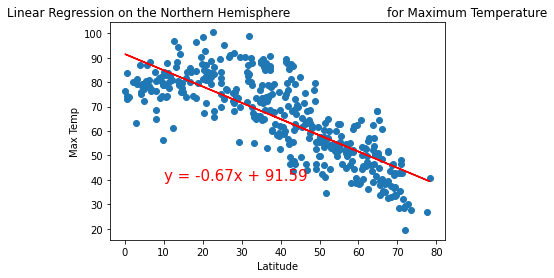

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

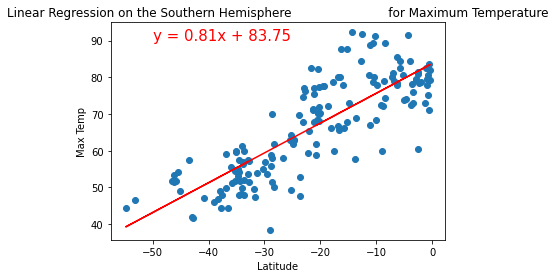

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

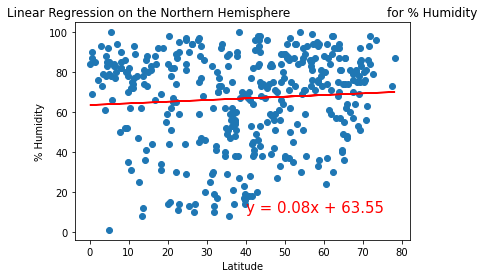

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

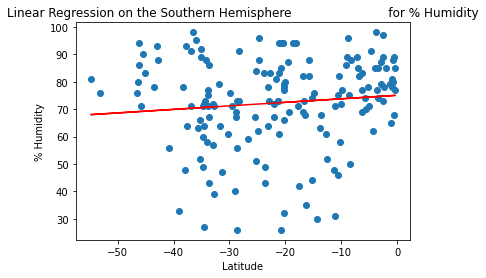

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

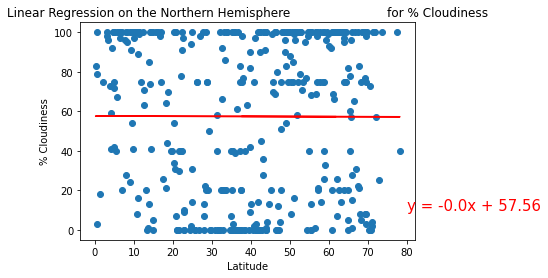

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(80,10))

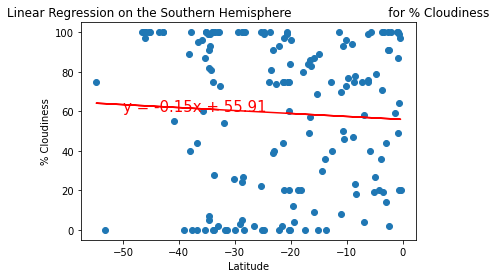

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

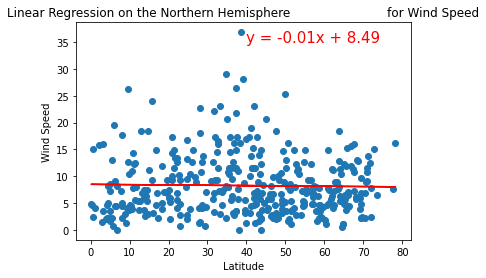

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

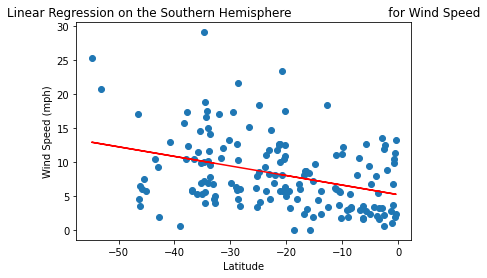

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,35))